In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Import all failed banks, record AsOfDate in a new column
failed_after_2010Q3 = pd.read_csv('data/failed_after_2010Q3', index_col=0)
failed_after_2010Q3['AsOfDate'] = '9/30/2010'

failed_after_2010Q2 = pd.read_csv('data/failed_after_2010Q2', index_col=0)
failed_after_2010Q3['AsOfDate'] = '6/30/2010'

failed_after_2010Q1 = pd.read_csv('data/failed_after_2010Q1', index_col=0)
failed_after_2010Q1['AsOfDate'] = '3/31/2010'

failed_after_2009Q4 = pd.read_csv('data/failed_after_2009Q4', index_col=0)
failed_after_2009Q4['AsOfDate'] = '12/31/2009'


In [30]:
columns_order = list(failed_after_2009Q4.columns)

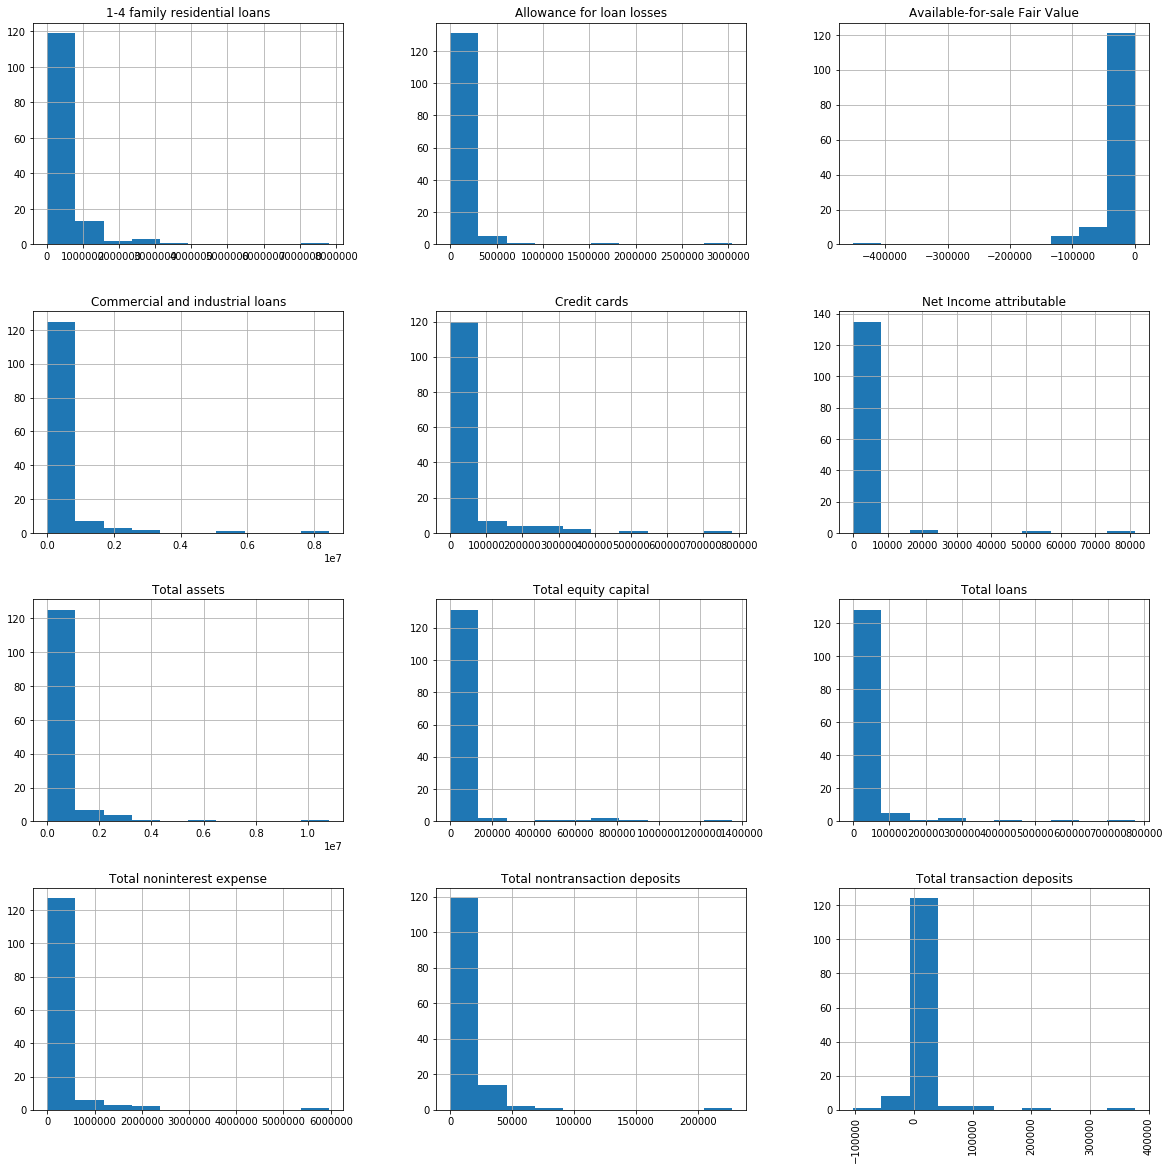

In [86]:
# Concat all and check data quality, EDA
sample_of_failed_banks = [failed_after_2009Q4, failed_after_2010Q3, failed_after_2010Q2, failed_after_2010Q1]
failed_universe = pd.concat(sample_of_failed_banks, sort=True)
failed_universe = failed_universe.reindex(columns=columns_order) 
failed_universe_eda = failed_universe.drop(['Other real estate loans', 'AsOfDate'], axis=1) #Drop control var for EDA purposes
failed_universe_eda.hist(figsize=(20,20), bins=10, histtype='bar')
plt.xticks(rotation=90)
plt.show()


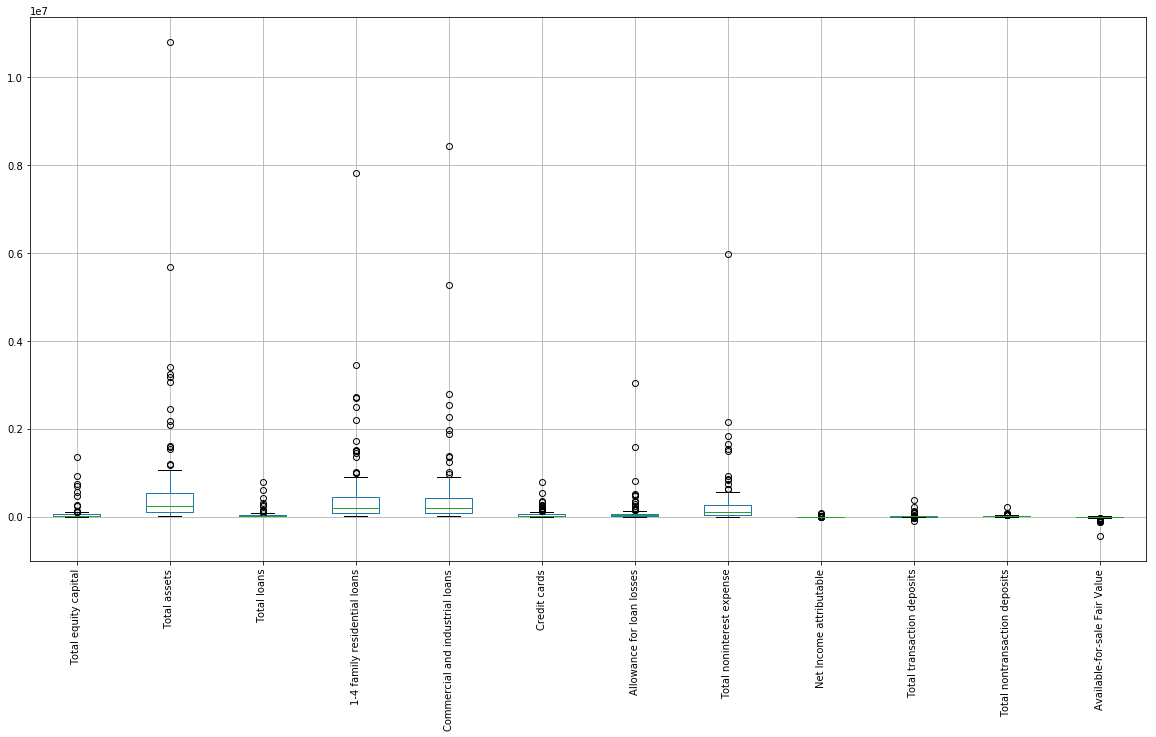

In [84]:
failed_universe_eda.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [91]:
# Code target as "1", i.e. failed bank
failed_universe['Target'] = 1
failed_universe.to_csv('data/failed_universe')


In [ ]:
 # Import healthy banks, set AsOfDate as 9/30/2010 for 2010Q3
    
    


In [ ]:
# Code target as "0", i.e. healthy bank



In [ ]:
# Concat all

In [ ]:
# Create CAMELS columns, save file - using failed_universe for POS for now will replace with banks_universe
failed_universe

In [ ]:
# 1) Total Equity / Total Assets (EQTA)
XXX['EQTA'] = XXX['RIAD3210']/XXX['RCON2170'] # <-- Total assest is a problem
# 2) Total Equity / Total Loans (EQTL)
XXX['EQTL'] = XXX['RIAD3210']/XXX['RCON3360'] 
# 3) NPLTA = Non Performing Loans / Total Assets
XXX['NPLTA']= (XXX['RCONC410'] + XXX['RCONC411']) / XXX['RCON2170'] 
#RCONC410  #Additions to nonaccrual assets during the previous six months
#RCONC411 # Nonaccrual assets sold during the previous six months


# 4) LLRTA = Loan Loss Reserves / Total Assest
XXX['LLRTA'] = XXX['RCON3123'] / XXX['RCON2170']
#RCON3123     # Allowance for loan and lease losses

# 5) #LLRGL = Loan Loss Reserves / Gross Loans (LLRGL)
XXX['LLRGL'] = XXX['RCON3123'] / XXX['RCON3360']

# 6) Operating Expenses / Assets (OEXTA)
XXX['OEXTA'] = XXX['RIAD4093'] / XXX['RCON2170']


# 7) Net Income / Total Assest (ROA)
# RIAD4340    # Net Income (Net income (loss) attributable to bank (item 12 minus item 13).)
XXX['ROA'] = XXX['RIAD4340'] / XXX['RCON2170']

# 8) Net Income / Total Equity (ROE)
XXX['ROE'] = XXX['RIAD4340'] / XXX['RIAD3210']

# 9) Total Loans / Total Customer Deposits (TLTD)
XXX['TLTD'] = XXX['RCON3360'] / (XXX['RCON2215']+XXX['RCON2385'])
#  RCON2215  # Total transaction accounts deposits 
#  RCON2385  # Total non-transaction accounts 
#
#
# 10) Total Customer Deposits / Total Assest (TDTA)
XXX['TDTA'] = (XXX['RCON2215'] + XXX['RCON2385'])/ XXX['RCON2170']
#
# 11) (S)ensitivity to market risk (TATA) = Trading Assets /Total assest
XXX['TATA'] = XXX['RCON3545'] / XXX['RCON2170']
#  RCON3545 # Trading Assets /Total assets

XXX.columns
X_CAMELS = XXX.drop(columns = ['RIAD3210', 'RCON2170', 'RCON3360', 'RCONC410', 'RCONC411', 'RCON3123',
       'RIAD4093', 'RIAD4340', 'RCON2215', 'RCON2385', 'RCON3545'], axis=1)

In [ ]:
#EQTA = RIAD3210 / RCON2170 # 1) Total Equity / Total Assets (EQTA) = 0.08 for ID=367851

#RCON3360 = report_df.loc[report_df.ValueID == 'RCON3360'] #Total loans of 16517  for ID=367851
#EQTL = RCONG105 / RCON3360 # Total Equity / Total Loans (EQTL)

#NPLTA = Non Performing Loans / Total Assets (NPLTA)
#RCONC410  #Additions to nonaccrual assets during the previous six months
#RCONC411 # Nonaccrual assets sold during the previous six months

#LLRTA = Loan Loss Reserves / Total Assest
# RCON3123     # Allowance for loan and lease losses

#LLRGL = Loan Loss Reserves / Gross Loans (LLRGL)


# (M)anagement quality
#       7) Operating Expenses / Assets (OEXTA)
# RIAD4093 # Total noninterest expense (sum of items 7.a through 7.d).




#       - Operating Costs / Net Operating Income (OCNOI)
#
#
# (E)arnings ability
#       8) Net Income / Total Assest (ROA)
# RIAD4340    # Net Income (Net income (loss) attributable to bank (item 12 minus item 13).)
#       9) Net Income / Total Equity (ROE)
# 
#
#
#(L)iquidity, i.e. ability to fulfill its short-term liability
#       10) Total Loans / Total Customer Deposits (TLTD)
#  RCON2215  # Total transaction accounts deposits 
#  RCON2385  # Total non-transaction accounts 
#
#
#       11) Total Customer Deposits / Total Assest (TDTA)
#
#
#
# (S)ensitivity to market risk 
#  RCON3545 # Trading Assets /Total assest
#
#
#  Schedule RC-B: Securities 
#  RCON1754 # (Column A) Held-to-maturity Amortized Cost
#  RCON1771 # (Column B) Held-to-maturity Fair Value
#  RCON1772 # (Column C) Available-for-sale Amortized Cost
#  RCON1773 # (Column D) Available-for-sale Fair Value
